In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [2]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [3]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Mangesh\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=4,
    batch_size=128,
    validation_data=(X_test, y_test)
)


Epoch 1/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9054 - loss: 0.3094 - val_accuracy: 0.9783 - val_loss: 0.0678
Epoch 2/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9718 - loss: 0.0943 - val_accuracy: 0.9856 - val_loss: 0.0426
Epoch 3/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9805 - loss: 0.0688 - val_accuracy: 0.9889 - val_loss: 0.0343
Epoch 4/4
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9830 - loss: 0.0576 - val_accuracy: 0.9899 - val_loss: 0.0274


In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.9898999929428101


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


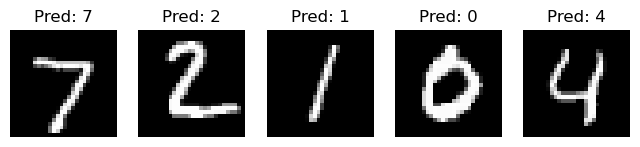

In [8]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(X_test)

plt.figure(figsize=(8, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted Label: [4]


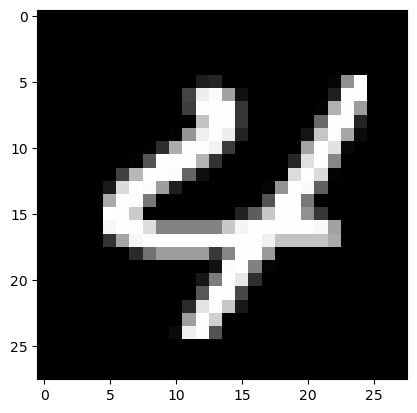

In [10]:
# test the model on a random unseen image to visually verify that the prediction is correct
import random

index = random.randint(0, len(X_test))
image = X_test[index]
pred = model.predict(np.array([image]))
print("Predicted Label:", pred.argmax(axis=1))
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.show()
